In [1]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<Axes: xlabel='ds', ylabel='y'>

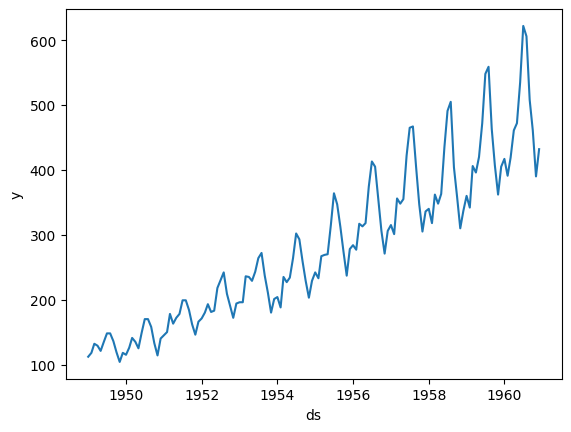

In [4]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [9]:
from prophet import Prophet
model = Prophet()

In [10]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8eqjgbx/outr7lm3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8eqjgbx/8vr1l6h_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38441', 'data', 'file=/tmp/tmpt8eqjgbx/outr7lm3.json', 'init=/tmp/tmpt8eqjgbx/8vr1l6h_.json', 'output', 'file=/tmp/tmpt8eqjgbx/prophet_modelrln8r05i/prophet_model-20240304025954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:59:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:59:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
# 5 予測
future = model.make_future_dataframe(periods=36, freq='MS')
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [13]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,57.644123,114.300357,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,51.468699,108.398416,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,81.983538,138.350652,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,80.846952,137.437318,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,82.071963,138.040689,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,620.539945,680.796946,580.469865,586.033655,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,573.732509,632.560375,583.491694,589.313042,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,539.407263,596.274074,586.373551,592.493576,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,505.063362,563.011225,589.312830,595.795725,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.018883,57.644123,114.300357
1,1949-02-01,79.495226,51.468699,108.398416
2,1949-03-01,111.025581,81.983538,138.350652
3,1949-04-01,108.719017,80.846952,137.437318
4,1949-05-01,112.095281,82.071963,138.040689
...,...,...,...,...
175,1963-08-01,650.733803,620.539945,680.796946
176,1963-09-01,603.483588,573.732509,632.560375
177,1963-10-01,567.259613,539.407263,596.274074
178,1963-11-01,535.439784,505.063362,563.011225


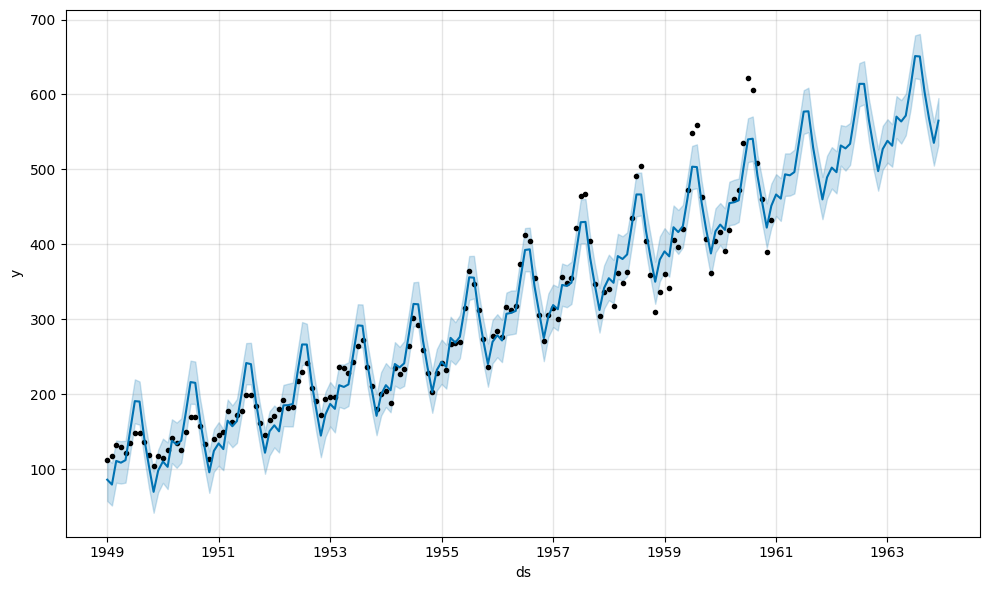

In [16]:
fig_forecast = model.plot(forecast)

In [19]:
# cutoffsとして４つの日付をもつデータを作成します。

cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])

In [20]:
from prophet.diagnostics import cross_validation

In [21]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8eqjgbx/hr9qvajv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8eqjgbx/urkpbget.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9965', 'data', 'file=/tmp/tmpt8eqjgbx/hr9qvajv.json', 'init=/tmp/tmpt8eqjgbx/urkpbget.json', 'output', 'file=/tmp/tmpt8eqjgbx/prophet_model7oy3_yxz/prophet_model-20240304044316.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:43:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8eqjgbx/d8xord5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt8eqjgbx/i0z04lgh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [22]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,226.821354,250.081323,242,1954-12-01
1,1955-02-01,241.792078,230.455895,253.123829,233,1954-12-01
2,1955-03-01,267.141230,256.412670,277.902376,267,1954-12-01
3,1955-04-01,257.744480,246.308556,268.756790,269,1954-12-01
4,1955-05-01,261.961916,251.469376,272.911820,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,548.443272,528.265118,569.519364,606,1957-12-01
140,1960-09-01,511.578231,490.842568,532.974340,508,1957-12-01
141,1960-10-01,480.747994,460.189485,501.471470,461,1957-12-01
142,1960-11-01,455.417988,434.144594,476.081641,390,1957-12-01


In [24]:
from prophet.diagnostics import performance_metrics

In [25]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,121 days,687.400156,26.218317,19.285619,0.060133,0.039788,0.057291,0.535714
1,122 days,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.571429
2,151 days,644.424799,25.385523,18.070242,0.055246,0.032945,0.052755,0.607143
3,152 days,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.642857
4,182 days,583.584697,24.157498,17.463575,0.050684,0.030947,0.050311,0.595238


In [27]:
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.571429
1,5,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.642857
2,6,676.263707,26.005071,19.591839,0.056243,0.030947,0.056366,0.535714
3,7,1338.378492,36.583856,29.852167,0.078469,0.091159,0.081789,0.357143
4,8,1849.989022,43.011499,38.904615,0.097044,0.107401,0.102882,0.178571


<Axes: xlabel='horizon', ylabel='mse'>

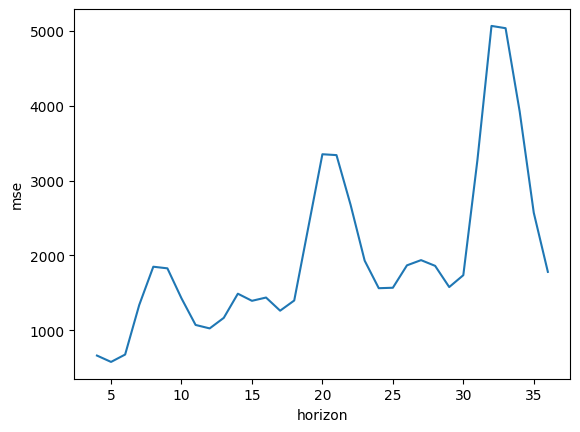

In [28]:
sns.lineplot(x='horizon', y='mse', data=df_p)

<Axes: xlabel='horizon', ylabel='coverage'>

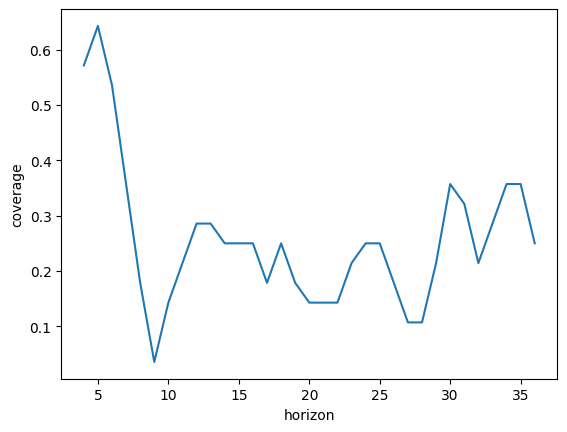

In [30]:
sns.lineplot(x='horizon', y='coverage', data=df_p)